In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("revenue_prediction.csv")
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df.shape

(100, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
df = df.drop(columns = ['Id','Name','Franchise','Category','City','No_Of_Item'])

In [8]:
df

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
...,...,...
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
y_pred

array([6351103.23642516, 5984998.65773576, 4032440.90472562,
       3788371.18559936, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559936,
       6107033.5172989 , 5740928.93860949, 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

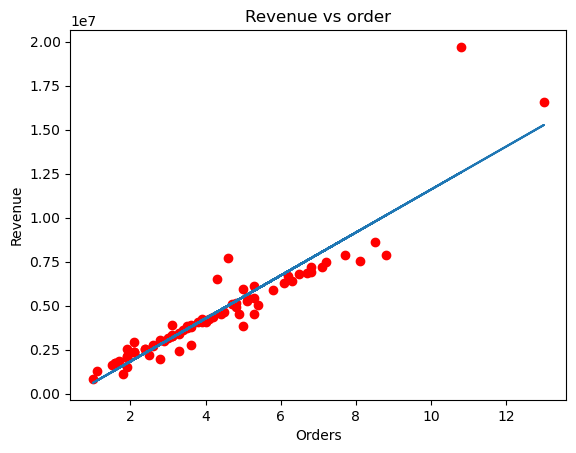

In [19]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train))
plt.title("Revenue vs order")
plt.xlabel("Orders")
plt.ylabel("Revenue")
plt.show()

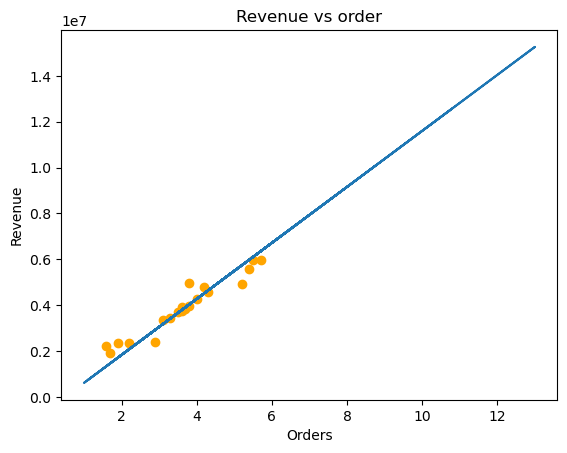

In [20]:
plt.scatter(X_test,y_test, color = 'orange')
plt.plot(X_train,regressor.predict(X_train))
plt.title("Revenue vs order")
plt.xlabel("Orders")
plt.ylabel("Revenue")
plt.show()

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score

0.9109612329066814